In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Polinomiale_IN.csv'
INPUT_df = pd.read_csv(path)

In [3]:
INPUT_df.head()

,Superficie,Prezzo
0,60,338611
1,70,655033
2,140,5697001
3,150,7011305
4,79,534887


In [4]:
INPUT_df.shape

(108, 2)

In [5]:
# remove nan values

INPUT_df = INPUT_df.dropna(1, "all") #remove rows
INPUT_df = INPUT_df.dropna(0, "all") #remove columns

In [6]:
# convert to numpy arrays

np_IN = np.array(INPUT_df)

In [7]:
# split into features and target columns

np_IN_X = np_IN[:,0]
np_IN_y = np_IN[:,1]

In [8]:
np_IN_X.shape

(108,)

In [9]:
np_IN_y.shape

(108,)

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


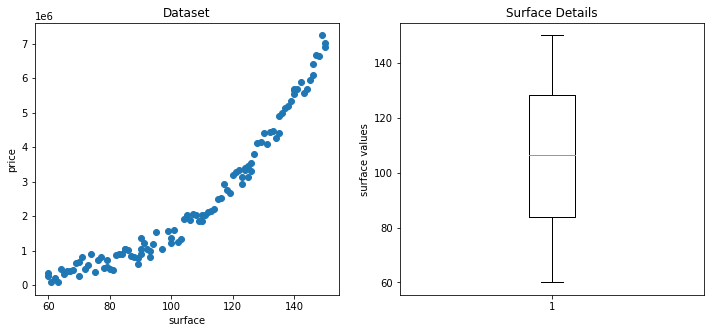

In [10]:
# plot data

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel("surface")
axs[0].set_ylabel("price")
axs[0].set_title("Dataset")
axs[1].boxplot(np_IN_X)
axs[1].set_ylabel("surface values")
axs[1].set_title("Surface Details")
fig.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [11]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

TEST
R^2= 0.8688998080904657 
MSE= 388478984812.318726 

TRAIN
R^2= 0.9051864647366753 
MSE= 413043373468.696106 



C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


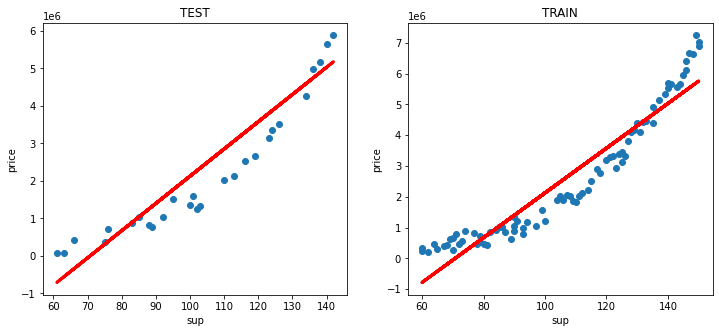

In [13]:
# reshape features to be used with LinearRegression's methods

X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1, 1))

# train the linear regressor

reg = LinearRegression().fit(X_train_r, y_train)

# predict using trained model

y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

# evaluate the model by using R2=1-RSE and MSE

R2=reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

# plot the solution

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)
axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)
axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup')
axs[1].set_ylabel('price')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)
fig.show()

### Polynomial model

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# modify features to polynomial aspect

poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train_r)
X_poly_test = poly_reg.fit_transform(X_test_r)
X_poly_all = poly_reg.fit_transform(X_all)


# train the Linear Regression with trandformed 'polinomially' features

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

# predict using fitted model

y_pred_test=pol_reg.predict(X_poly_test)
y_pred_train=pol_reg.predict(X_poly_train)
y_pred_all=pol_reg.predict(X_poly_all)

# evaluate the model by using R=1-RSE and MSE

R2=pol_reg.score(X_poly_test,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=pol_reg.score(X_poly_train,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

TEST
R^2= 0.9869412530464168 
MSE= 38695967454.796890 

TRAIN
R^2= 0.990957351477647 
MSE= 39393173563.154190 



C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


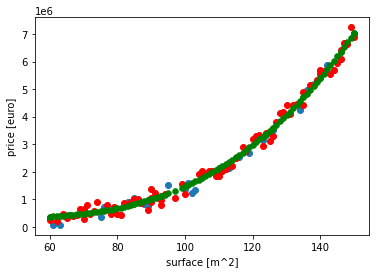

In [16]:
# plot the solution

fig, axs = plt.subplots(1,1)
axs.set_xlabel('surface [m^2]')
axs.set_ylabel('price [euro]')
axs.scatter(X_test,y_test)
axs.scatter(X_train,y_train,color='red')
axs.scatter(X_all,y_pred_all,c='green',linewidth=0.5)
fig.show()